# Camera Calibration with OpenCV

Some good background for calibration is found in the OpenCV [documentation](http://docs.opencv.org/3.1.0/d4/d94/tutorial_camera_calibration.html).

In [1]:
%matplotlib inline

In [20]:
from __future__ import print_function
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import cv2

Let's print what version of `OpenCV` we have and grab some tools from `pygecko` to make things easier.

In [21]:
print('OpenCV version {}'.format(cv2.__version__))
from pygecko.tools.camera_calibrate import CameraCalibration
import glob

OpenCV version 3.1.0-dev


## Calibrate Camera

Now grab a bunch of calibration images from a folder:

In [5]:
calibration_images = '{0!s}/shot_*.png'.format(('images'))
images = []
images = glob.glob(calibration_images)

Create a calibration object and set it up to find a 9x6 checkerboard:

In [17]:
cal = CameraCalibration()
cal.marker_size = (9, 6)
cal.marker_checkerboard = True
cal.calibrate(images)
cv2.destroyAllWindows()

[+] chess - found corners:  54
[+] chess - found corners:  54
[+] chess - found corners:  54
[+] chess - found corners:  54
[+] chess - found corners:  54
[+] chess - found corners:  54
[+] chess - found corners:  54
[+] chess - found corners:  54
[+] chess - found corners:  54
[+] chess - found corners:  54
[+] chess - found corners:  54
[+] chess - found corners:  54
[+] chess - found corners:  54
[+] chess - found corners:  54


The resulting camera info shows a low level of distortion, so the effect with and without the correction will be small to the human eye. However, for computer vision, it will make a small difference.

In [30]:
cal.printMat()
# import pprint as pp
# pp.pprint(cal.data)

focal length 654.7 654.4
image center 290.9 248.9
radial distortion -0.036 0.091
tangental distortion -0.000 -0.013


## Undistort Image

Now let's read back in an image and use the calibration matrix to undistort it.

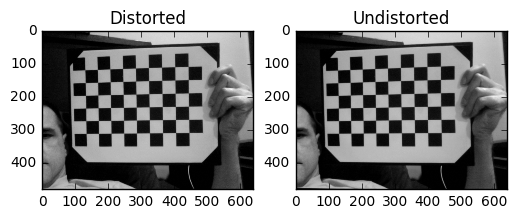

In [31]:
image = cv2.imread(images[0], 0)
dst = cal.undistort(image)

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray', interpolation = 'bicubic');
plt.title('Distorted')

plt.subplot(1,2,2)
plt.imshow(dst, cmap='gray', interpolation = 'bicubic');
plt.title('Undistorted');

## Save

We can save the calibration matrix for later:

In [25]:
cal.save_file = 'cal.npy'
cal.save()